#Exemplo 1
Uma névoa (gotículas transportadas pelo ar ou aerossóis) é gerada quando fluidos para remoção de metal são usados em operações de máquina para resfriar e lubrificar a ferramenta e a peça. A produção de névoa é uma preocupação para a *Occupational Safety and Health Administration* (OSHA), que recentemente diminuiu substancialmente o nível padrão nos locais de trabalho. 

O artigo *Variables affecting mist generation from metal removal fluids, (Lubrication Engr., 2002: 10-17)* apresentou os dados a seguir sobre x = velocidade do fluxo do fluido para um óleo 5 \% solúvel (cm/s) e y = a quantidade de gotículas de névoa com diâmetro menor que 10 mm (mg/m3):


In [ ]:
#@title Tabela de dados
from tabulate import tabulate
table = [["x",  89 , 177,  189,  354,  362,  442,  965],
         ["y", 0.40, 0.60, 0.48, 0.66 ,  0.61,  0.69,  0.99 ]]
print(tabulate(table))

-  ----  -----  ------  ------  ------  ------  ------
x  89    177    189     354     362     442     965
y   0.4    0.6    0.48    0.66    0.61    0.69    0.99
-  ----  -----  ------  ------  ------  ------  ------


**1a.** Os pesquisadores executaram uma análise de regressão linear simples para relacionar as duas variáveis. O gráfico de dispersão dos dados apoia essa estratégia?

**1b.** Que proporção da variação observada no volume de névoa pode ser atribuída à relação de regressão linear simples entre velocidade e névoa?

**1c.** Os investigadores estavam particularmente interessados no impacto sobre a névoa ao aumentar a velocidade de 100 para 1000 (um fator de 10 correspondente à diferença entre o menor e o maior valores *x* na amostra). Quando x aumenta dessa forma, há alguma evidência significativa de que o aumento médio verdadeiro em *y* seja menor que 0,6?

**1d.** Estime a mudança média verdadeira na névoa associada com um aumento de velocidade de 1 cm/s. Faça isso de maneira que transmita informações sobre precisão e confiança.

## Resposta 1a.

Os pesquisadores executaram uma análise de regressão linear simples para relacionar as duas variáveis. O gráfico de dispersão dos dados apoia essa estratégia?
Verificar 📊

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#Primeiro definir os dados
lstx = (89 , 177,  189,  354,  362,  442,  965)
lsty= (0.40, 0.60, 0.48, 0.66 ,  0.61,  0.69,  0.99 )
# Construir o DataFrame e nomear as colunas
df = pd.DataFrame(list(zip(lstx, lsty)),
               columns =["x","y"])
df

,x,y
0,89,0.40
1,177,0.60
2,189,0.48
3,354,0.66
4,362,0.61
5,442,0.69
6,965,0.99


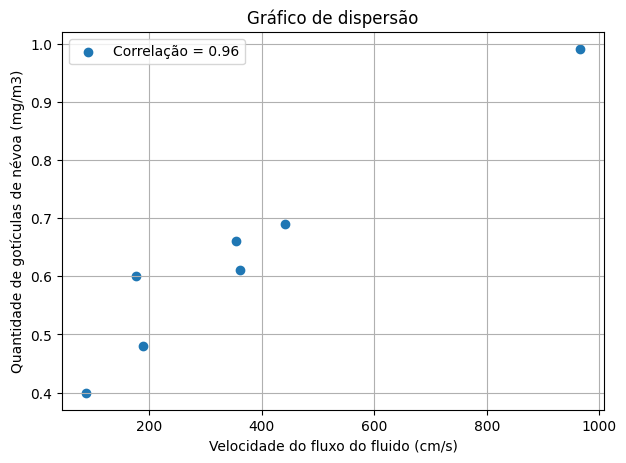

In [ ]:
 #diagrama de dispersão
x=df['x']
y=df['y']
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
plt.scatter(x,y, label=f'Correlação = {np.round(np.corrcoef(x,y)[0,1], 2)}')
plt.xlabel('Velocidade do fluxo do fluido (cm/s)')
plt.ylabel('Quantidade de gotículas de névoa (mg/m3)') 
plt.title('Gráfico de dispersão')
plt.legend()
plt.grid(True)
plt.show()

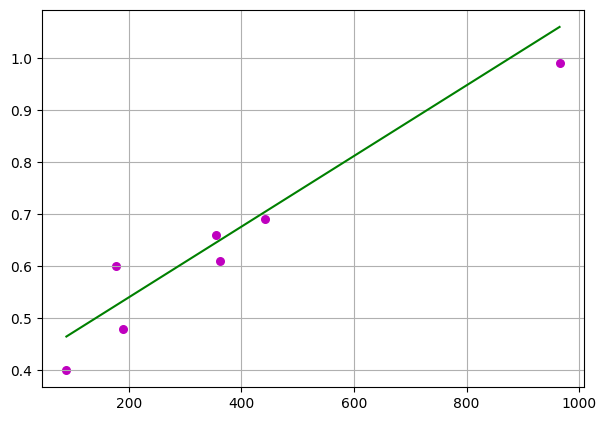

In [ ]:
#yp Reta de regressão obtida com antecedência
yp=0.4041+0.00068*x 
plt.plot(x, yp, color = "g")
plt.scatter(x, y, color = "m",  marker = "o", s = 30)
plt.grid(True)

🙋 Sim, o diagrama de dispersão confirma que a estrágia adotada (regressão linear) é adequada para os dados

## Resposta 1b.
Que proporção da variação observada no volume de névoa pode ser atribuída à relação de regressão linear simples entre velocidade e névoa?

🤔💭 Posso medir a proporção mediante o coeficiente de correlação ou mediante o coeficiente de determinação?

🙋 Como está se referindo **à relação de regressão linear** simples entre velocidade (*x*) e névoa (*y*) então é **coeficiente de determinação**

In [ ]:
x = sm.add_constant(x)
#fit linear regression model
modelo = sm.OLS(y, x).fit() #
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     67.15
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           0.000440
Time:                        19:26:45   Log-Likelihood:                 11.671
No. Observations:                   7   AIC:                            -19.34
Df Residuals:                       5   BIC:                            -19.45
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4041      0.035     11.684      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/stats/stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


**Explicação do resultado** OLS (*Ordinary Least Squares*)
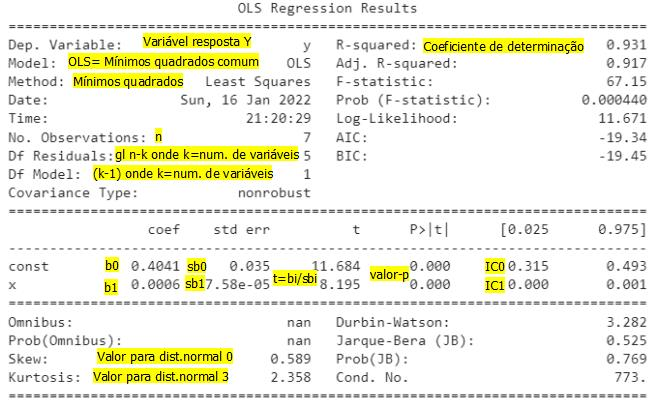

De acordo com as informações o $r^2=0,931$ o que indica que uma porcentagem de 93,1 \% de relação da quantidade de gotículas de névoa em função da velocidade do fluxo.

A reta de regressão é $Y= 0,4041 + 0,0006x$

Verificar calculando manualmente 

In [ ]:
#@title função linreg
#O seguinte código pode também ser usado previamente para calcular SQE, SQT, SQR e r2 (Alternativa 2)
# fonte: Adaptado de https://www.geeksforgeeks.org/sum-function-python/
def linreg(X, Y):
    """
    retorna a solução b0 e b1 para a reta y = b0 + b1x e todas as somatórias necessárias
    """
    N = len(X)
    Sx = Sy = Sxx = Syy = Sxy = 0.0
    for x, y in zip(X, Y):
        Sx = Sx + x           # Somatória do termos x
        Sy = Sy + y           # Somatória do termos y
        Sxx = Sxx + x*x       # Somatória do termos x^2
        Syy = Syy + y*y       # Somatória do termos y^2
        Sxy = Sxy + x*y       # Somatória do termos x vezes y
    det = Sxx * N - Sx * Sx   # variável auxiliar
    Sxxt= Sxx - Sx*Sx/N       # Termo Sxx
    Sxyt= Sxy - Sx*Sy/N       # Termo Sxy  
    Syyt= Syy - Sy*Sy/N       # Termo Syy  
    r=Sxyt/pow((Sxxt*Syyt), 1/2)
    return (Sxy * N - Sy * Sx)/det, (Sxx * Sy - Sx * Sxy)/det, Sx, Sy, Sxx,  Syy , Sxy, Sxxt, Sxyt, Syyt,r

In [ ]:
#obter os valores necessários para calcular SQE e afins
x=df['x']
y=df['y']
b1,b0,sox,soy,sox2,soy2,soxy,sxx,sxy,syy,corr = linreg(x,y)  
#Calcular SQE, SQT e SQR
sqe=syy-b1*sxy
sqt=syy
sqr=sqt-sqe
#calcular r^2 coeficiente de determinação
r2=1-sqe/sqt
#Calcular variância estimada
s2=sqe/(len(y)-2)
#Calcular desvio padrão estimado
s=pow(s2,1/2)
#Calcular erro padrão
ebeta=s/pow(sxx,1/2)

print('b0= {0},b1= {1}'.format(b0,b1))
print('Somatória x= {0}, Somatória y= {1},Somatória xy= {2}'.format(sox,soy,soxy))
print('Somatória x^2= {0}, Somatória y^2= {1}'.format(sox2,soy2))
print('Sxx= {0}, Syy {1}, Sxy {2}'.format(sxx,syy,sxy))
print('Coeficiente de correlação= {0}'.format(corr))
print('SQE= {0}, SQT {1}, SQR {2}'.format(sqe,sqt,sqr))
print('Variância estimada, s^2= {0}, Desvio padrão estimado, s= {1}'.format(s2,s))
print('Coeficente de determinação, r^2= {0}, Erro padrão, s_b1= {1}'.format(r2,ebeta))

b0= 0.40412378531397253,b1= 0.0006210758350667933
Somatória x= 2578.0, Somatória y= 4.43,Somatória xy= 1947.31
Somatória x^2= 1457920.0, Somatória y^2= 3.0142999999999995
Sxx= 508479.4285714285, Syy 0.21074285714285734, Sxy 315.8042857142857
Coeficiente de correlação= 0.9647280228801388
SQE= 0.014604446675185179, SQT 0.21074285714285734, SQR 0.19613841046767216
Variância estimada, s^2= 0.0029208893350370357, Desvio padrão estimado, s= 0.054045252659572565
Coeficente de determinação, r^2= 0.9307001581302222, Erro padrão, s_b1= 7.579156202786891e-05


In [ ]:
#print(modelo.t_test([0, 1]))

##Resposta 1c.
Os investigadores estavam particularmente interessados no impacto sobre a névoa ao aumentar a velocidade de 100 para 1000 (um fator de 10 correspondente à diferença entre o menor e o maior valores x na amostra). Quando x aumenta dessa forma, há alguma evidência significativa de que o aumento médio verdadeiro em y seja menor que 0,6?


🤔💭 A variação de y para um determinado valor de x depende da inclinação, qual parâmetro representa a inclinação?

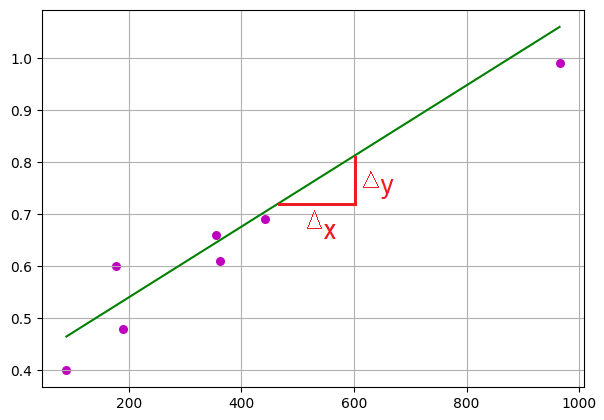

🙋 $\beta_1$

🤔💭 Então o problema está pedindo para testar a hipótese do $\beta_1$ com algum valor, certo? qual? 

🙋 A nova inclinação $\beta_{10}=\frac{Δy}{Δx}$ #Conceito da inclinação de uma reta

Neste caso a variação em $y$, ou ${Δy}$ da reta, é 0,6 e a variação em x ou ${Δx}$ da reta é $x_2 - x_1$ onde $x_1=100$ e $x_2=1000$ assim ${Δx} = 900$

$\beta_{10}=\frac{0,6}{900}=0,0006667$

🤔💭 então eu devo testar a hipótese nula com esse dato?

🙋 Sim!, Verificar se $H_0$ é verdadeira para esse valor ou se é menor

Testar se $H_0: \beta_1=0,0006667$ é verdadeira vs. $H_a: \beta_1 < 0,0006667$

Da tabela t-student $t_{crit}$ para 5 gl para o nível de confiança de 95 \% 




In [ ]:
#usar a tabela tstudent
from scipy.stats import t
alpha = 0.05  # nível de significia = 5% 
df = len(x) - 2 # graus de liberdade (Número de amostras menos dois)                                     
#
v = t.ppf(1 - alpha/2, df) 
tcrit=v
print(f'tcrit=: {v}') 

tcrit=: 2.5705818366147395


Sendo que $\beta_{10} \neq 0$ a estatística de teste  será

$t=\frac{\hat{\beta}_1-\beta_{10}}{s_{\hat{\beta}_1}}$ # da reta $\beta_1=0,00062108$

$t=\frac{0,00062108-0,0006667}{0,0000758}=-0,60185$

Agora é necessário comparar se:

$|t| \geq t_{crit}$

$ -0,61 \geq 2,5706$ ❎

Portanto não ha evidencia suficiente para rejeitar $H_0$ em favor de $H_a$,  $H_a: \beta_1 < 0,0006667$ não é verdadeira.
Dito de outra forma não há evidência suficiente de que com um aumento de 100 para 1000, o verdadeiro aumento médio em y é menor que 0,6.

Obs. Os resultados do quadro OLS tem od dados do teste de hipótese apenas para validar a funcionalidade do modelo.

## Resposta 1d.
Estime a mudança média verdadeira na névoa associada com um aumento de velocidade de 1 cm/s. Faça isso de maneira que transmita informações sobre precisão e confiança.

Usar as informações obtidas previamente

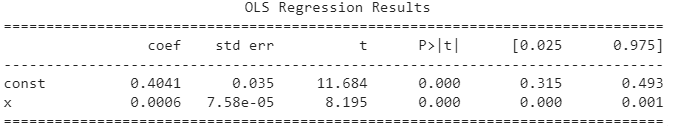

IC de $\beta_1= \hat{\beta}_1 \pm t_{\frac{\alpha}{2},n-2} s_{\hat{\beta}_1}  $

In [ ]:
#Cálculo do intervalo de confiança de b1
#v é o nome com que foi armazenado t_crit
b1a=b1+v*7.58e-5
b1b=b1-v*7.58e-5
b1b,b1a

(0.000426225731851396, 0.0008159259382821906)

In [ ]:
#Alguns complementos para observação 
y_pred=modelo.predict()
y_pred

array([0.45939953, 0.51405421, 0.52150712, 0.62398463, 0.62895324,
       0.6786393 , 1.00346197])

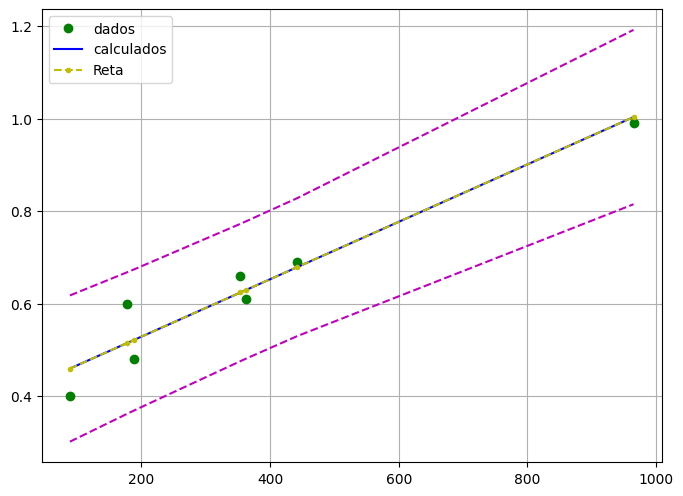

In [ ]:
#Observar o intervalo de previsão
pred_ols = modelo.get_prediction()
iv_l = pred_ols.summary_frame()["obs_ci_lower"] #dentro [] define só mostrar extremos
iv_u = pred_ols.summary_frame()["obs_ci_upper"]

fig, ax = plt.subplots(figsize=(8, 6))

ax.plot(x, y, "go", label="dados")
ax.plot(x, y_pred, "b-", label="calculados")
ax.plot(x, modelo.fittedvalues, "y--.", label="Reta")
ax.plot(x, iv_u, "m--")
ax.plot(x, iv_l, "m--")
ax.legend(loc="best")
plt.grid(True)

# Exemplo 2.
As tecnologias eletromagnéticas oferecem técnicas efetivas de detecção não destrutiva para determinar características de pavimentação. A propagação de ondas eletromagnéticas através do material depende das suas propriedades dielétricas. Os dados a seguir, gentilmente fornecidos pelos autores do artigo *“Dielectric modeling of asphalt mixtures and relationship with den-sity”* (J. of Transp. Engr., 2011: 104-111), foram utilizados para relacionar 

y = constante dielétrica a 

x = vácuo de ar (%) 

para 18 amostras tendo 5% de teor de asfalto.

A reta de regressão é $Y=4,8587 -0,07468 x$

O coeficiente de determinação deste dados foi $r^2=0,7797$ e o desvio padrão estimado de $\beta_1$ e 0,09923
Faça um teste da hipótese para verificar se o valor da variação da constante dielétrica frente à porcentagem de vácuo pode ser maior que -0,05, utilizando um nível de significância de 0,01.

**Definir hipóteses nula e alternativa**

$H_0: \beta_1 = -0,05$ vs $H_a: \beta_1 > - 0,05$ 

Para um nível de significância de 0,01 ou $\alpha=0,01$ isto é o 99%.

definir $t_{crit}$ para o n-2=16 gl e $\alpha=0,01$




In [ ]:
#usar a tabela tstudent pata t
from scipy.stats import t
alpha = 0.01  # nível de significia = 1% 
df = 16 # graus de liberdade (Número de amostras menos dois)                                     
#
v = t.ppf(1 - alpha/2, df) 
tcrit2=v
print(f't_crit=: {v}')

t_crit=: 2.9207816223499967


Calcular a estatística de teste
Sendo que $\beta_{10} = - 0,05 $ e $s_{\beta_1}= 0,09923$ e da reta $\beta_1=-0,07468$, a estatística de teste será

$t=\frac{\hat{\beta}_1-\beta_{10}}{s_{\hat{\beta}_1}}$ 

$t=\frac{-0,07468-(-0.05)}{0,09923}$

In [ ]:
tt=(-0.07468+0.05)/0.09923
tt

-0.24871510631865357

Agora é necessário comparar se:

$|t| \geq t_{crit}$

$ 0,24872 \geq 2,9208$ ❎

É possível rejeitar a hipôtese, mas vamos testar também a opção do p-value.

In [ ]:
#usar a tabela tstudent
from scipy.stats import t
#calculate p-value ONE TAILED left side
p_val= t.cdf(x=tt, df=16)
p_val

0.40337274251449007

Verificar se $valor-p < \alpha$

$0,040 < 0,01$ ❎


Portando não é possível rejeitar a hipôtese nula em favor da hipôtese alternativa, isto é não há evidência suficiente de que $H_a: \beta_1 > -0,05$

Observe que na reta $\beta_1 = -0,07468$ 

**$-0,07468 < - 0,05$**


# Exemplo 3

Ligas de silício-germânio são usadas em certos tipos de células solares. O trabalho “*Silicon--germanium films deposited by low-frequenc plasma-enhanced chemical vapor deposition”* (J. of Material Res., 2006: 88-104) tratou a respeito de um estudo de diversas propriedades estruturais e elétricas. 

Considere os dados a seguir sobre 

x = concentração de Ge na fase sólida (variando de 0 a 1) e,

y = posição do nível de Fermi (eV)

Um gráfico de dispersão mostra uma relação linear substancial. 

In [ ]:
#@title Tabela de dados
from tabulate import tabulate
table = [["x",  0, 0.42, 0.23, 0.33, 0.62, 0.60, 0.45, 0.87, 0.90, 0.79, 1, 1, 1],
         ["y", 0.62, 0.53, 0.61, 0.59, 0.50, 0.55, 0.59, 0.31, 0.43, 0.46, 0.23, 0.22, 0.19]]
print(tabulate(table))

-  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----
x  0     0.42  0.23  0.33  0.62  0.6   0.45  0.87  0.9   0.79  1     1     1
y  0.62  0.53  0.61  0.59  0.5   0.55  0.59  0.31  0.43  0.46  0.23  0.22  0.19
-  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----  ----


Obtenha a curva de regressão e os valores necessários para responder as seguintes questões:

**3a.**	Obtenha uma estimativa intervalar da mudança esperada na posição do nível de Fermi associada com um aumento de 0,1 nas concentrações de Ge e interprete seu resultado. 

**3b.** Obtenha uma estimativa de intervalo para a média da posição do nível de Fermi quando a concentração é 0,50 e interprete seu resultado. 

**3c.** Obtenha um intervalo dos valores plausíveis para a posição resultante de uma única observação a ser feita quando a concentração é 0,50, interprete seu intervalo e o compare ao intervalo de (3b). 

**3d.** Obtenha IC simultâneos para a posição esperada quando a concentração é 0,3, 0,5 e 0,7; o nível de confiança conjunto deve ser de pelo menos 97%. 

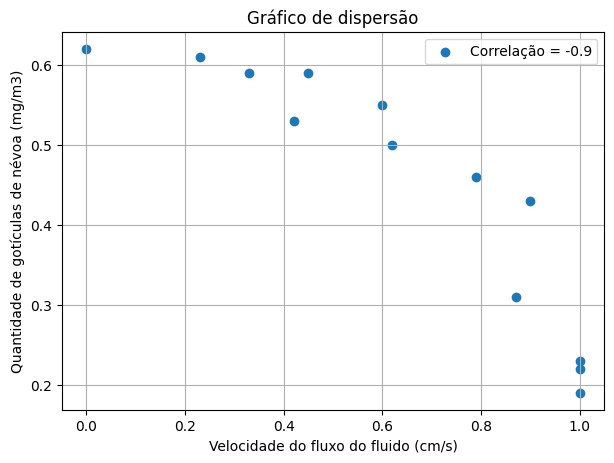

In [ ]:
#Primeiro definir os dados
lstx2 = (0, 0.42, 0.23, 0.33, 0.62, 0.60, 0.45, 0.87, 0.90, 0.79, 1, 1, 1)
lsty2= (0.62, 0.53, 0.61, 0.59, 0.50, 0.55, 0.59, 0.31, 0.43, 0.46, 0.23, 0.22, 0.19 )
# Construir o DataFrame e nomear as colunas
df = pd.DataFrame(list(zip(lstx2, lsty2)),
               columns =["x","y"])
#diagrama de dispersão
x=df['x']
y=df['y']
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})
plt.scatter(x,y, label=f'Correlação = {np.round(np.corrcoef(x,y)[0,1], 2)}')
plt.xlabel('Velocidade do fluxo do fluido (cm/s)')
plt.ylabel('Quantidade de gotículas de névoa (mg/m3)') 
plt.title('Gráfico de dispersão')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#Proceso de regressão 
x = sm.add_constant(x)
#fit linear regression model
modelo = sm.OLS(y, x).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.784
Method:                 Least Squares   F-statistic:                     44.43
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           3.53e-05
Time:                        19:26:45   Log-Likelihood:                 16.530
No. Observations:                  13   AIC:                            -29.06
Df Residuals:                      11   BIC:                            -27.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7217      0.046     15.753      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  "anyway, n=%i" % int(n))


## Resposta 3a.

Obtenha uma estimativa intervalar da mudança esperada na posição do nível de Fermi associada com um aumento de 0,1 nas concentrações de Ge e interprete seu resultado.

🤔💭 O qué preciso calcular? "estimativa intervalar da mudança esperada na posição do nível de Fermi associada com um aumento de 0,1 nas concentrações de Ge#

🙋 Y -> posição do nível de Fermi e X-> concentração de Ge na fase sólida.
A mudança de Y associada a um aumento de 0,1 em x pode ser descrita por um parâmetro, qual?

🤔💭 $\beta_1$?

Devo calcular o intervalo de confiança de $\beta_1$

IC de $\beta_1= \hat{\beta}_1 \pm t_{\frac{\alpha}{2},n-2} s_{\hat{\beta}_1}  $

In [ ]:
#b1
b=modelo.params
b0=b[0]#intercepto
b1=b[1]#inclinação
b1

-0.43268474608583807

In [ ]:
#usar a tabela tstudent pata t
from scipy.stats import t
alpha = 0.05  # nível de significia = 5% 
df = len(x) - 2 # graus de liberdade (Número de amostras menos dois)                                     
#
v = t.ppf(1 - alpha/2, df) 
ta2=v
print(f't=: {v}') 

t=: 2.200985160082949


In [ ]:
sb=modelo.bse #desvio padrão
#sb0=sb[0]    #desvio padrão de b0
sb1=sb[1]     #desvio padrão de b1
sb1

0.06491029555205573

In [ ]:
#IC de b1
IC2a1=([b1-ta2*sb1,b1+ta2*sb1])
IC2a1

[-0.575551343332511, -0.2898181488391652]

O intervalo de confiança de $\beta_1$ a 95% é (-0.5755, -0.2898)

In [ ]:
# outros úteis
#modelo.rsquared  #r^2 coeficiente de determinação
#modelo.predict() #valores previstos de y (y chapeu)
modelo.tvalues #estatística de teste
#modelo.df_resid #gl (n-2)

const    15.753215
x        -6.665888
dtype: float64

## Resposta 3b. 
Obtenha uma estimativa de intervalo para a média da posição do nível de Fermi quando a concentração é 0,50 e interprete seu resultado.

✌ Y -> posição do nível de Fermi e X-> concentração de Ge na fase sólida.

🤔💭 O que é a estimativa de intervalo para a média da posição do nível de Fermi, quando a concentração é 0,50 

🙋 Estimativa de Y para x=0,5, ou seja o intervalo de estimado de Y para um único valor de x.

$\mu_{Y,0.5}=\beta_0 + \beta_1 x^*=0,7217 - 0,4327 (0,5)$


In [ ]:
uy05=b0+b1*0.5
uy05

0.5053762242928298

🤔💭 Qual é a equação para o intervalo estimado de uma única observação?

IC de $\mu_{Y,0.5}$ pode se calcular com $\hat{Y} \pm t_{\frac{\alpha}{2},n-2} s_{\hat{Y}} $

e $s_{\hat{Y}}=s\sqrt(\frac{1}{n}+\frac{(x^* -\bar{x})^2}{S_{XX}})$



In [ ]:
df = pd.DataFrame(list(zip(lstx2, lsty2)),
               columns =["x","y"])
x=df['x']
y=df['y']
b1,b0,sox,soy,sox2,soy2,soxy,sxx,sxy,syy,corr = linreg(x,y)  
#Calcular SQE, SQT e SQR
sqe=syy-b1*sxy
sqt=syy
sqr=sqt-sqe
#Calcular variância estimada
s2=sqe/(len(y)-2)
#Calcular desvio padrão estimado
s=pow(s2,1/2)
#Calcular erro padrão
ebeta=s/pow(sxx,1/2)
print('Sxx= {0}, Syy {1}, Sxy {2}'.format(sxx,syy,sxy))
print('SQE= {0}, SQT {1}, SQR {2}'.format(sqe,sqt,sqr))
print('Variância estimada, s^2= {0}, Desvio padrão estimado, s= {1}'.format(s2,s))

Sxx= 1.2911692307692295, Syy 0.30156923076923103, Sxy -0.5586692307692305
SQE= 0.05984157650787639, SQT 0.30156923076923103, SQR 0.24172765426135465
Variância estimada, s^2= 0.005440143318897853, Desvio padrão estimado, s= 0.07375732722176051


In [ ]:
xs=0.5 #x*
xm=x.mean()
n=modelo.df_resid + 2 #gl+2=n
xs,xm,n

(0.5, 0.6315384615384616, 13.0)

In [ ]:
sy=s*pow(((1/n)+(xs-xm)*(xs-xm)/sxx),1/2)
sy

0.022166944519205978

In [ ]:
#IC do valor esperado para um valor específico de x 
ICuy05=([uy05-ta2*sy,uy05+ta2*sy])
ICuy05

[0.4565871083616754, 0.5541653402239842]

$0.4566 < \mu_{Y,0.5} < 0.5542 $
## Resposta 3c.

2c. Obtenha um intervalo dos valores plausíveis para a posição resultante de uma única observação a ser feita quando a concentração é 0,50, interprete seu intervalo e o compare ao intervalo de (3b).

-> Intervalo de previsão de Y para x=0,5.

🤔💭 Qual é a equação para o intervalo de previsão?

IP de $Y_{0.5}$ pode se calcular com $\hat{Y} \pm t_{\frac{\alpha}{2},n-2} \sqrt{s^2+s^2_\hat{Y}}) $



In [ ]:
#valor de y-chapeu para uma única observação uy05 calculado em 2b
#ta2 valor t-student usado nos items anteriores
ip1y05=([uy05-ta2*pow((s2+sy*sy),1/2),uy05+ta2*pow((s2+sy*sy),1/2)])
ip1y05

[0.33586440113680754, 0.6748880474488521]

A 95% de confiança IP é $0.3359 < Y < 0.67489$

## Resposta 3d. 
Obtenha IC simultâneos para a posição esperada quando a concentração é 0,3, 0,5 e 0,7; o nível de confiança conjunto deve ser de pelo menos 97%.

🤔💭 posição esperada-> $\mu_{Y,x^*}$

Considerando que $100(1-k\alpha) \% \approx 97 \%$ 

Quantidade de observações simultâneas k=3 encontrar $\alpha$

$(1-k\alpha) = 0,97 $ 

$1-3\alpha = 0,97 $ 

$\alpha = \frac{0.03}{3} = 0,01$

Portanto cada observação deve ter um $\alpha = 0,01$, isto é o 99% de confiança

In [ ]:
#100(1-alpha) de cada intervalor
0.99*0.99*0.99

0.9702989999999999

🤔💭 o que muda quando comparo com os IC calculados para 95%?

🙋 o valor obtido da tabela t-student

IC de $\mu_{Y,x^*}$ pode se calcular com $\hat{Y}_1 \pm t_{\frac{\alpha}{2},n-2} s_{\hat{Y}} $

e $s_{\hat{Y}}=s\sqrt(\frac{1}{n}+\frac{(x^* -\bar{x})^2}{S_{XX}})$

Observe que o valor de $s_{\hat{Y}}$  varia para cada valor de X porque depende do $x^*$

Assim precisa calcular o $\mu_{Y,x^*}$ e  o$s_{\hat{Y}}$ para cada amostra de x.

**Cálculos**

$\mu_{Y,x^*}$ 

Estimativa de Y para x=0,3, 0,5 e 0,7, ou seja o intervalo de estimado de Y para um único valor de cada x indicado.

$\mu_{Y,x^*}=\beta_0 + \beta_1 x^*=0,7217 - 0,4327 (x^*)$

$\mu_{Y,0.3}=\beta_0 + \beta_1 x_{0,3}=0,7217 - 0,4327 (0,3)$

$\mu_{Y,0.5}=\beta_0 + \beta_1 x_{0,5}=0,7217 - 0,4327 (0,5)$

$\mu_{Y,0.7}=\beta_0 + \beta_1 x_{0,7}=0,7217 - 0,4327 (0,7)$

In [ ]:
x3 = 0.3
x5 = 0.5
x7 = 0.7
uy03d=b0+b1*x3
uy05d=b0+b1*x5
uy07d=b0+b1*x7
uy03d,uy05d,uy07d

(0.5919131735099966, 0.505376224292829, 0.4188392750756616)

In [ ]:
#usar a tabela tstudent pata t
from scipy.stats import t
alpha = 0.01  # nível de significia = 5% 
df = len(x) - 2 # graus de liberdade (Número de amostras menos dois)                                     
#
v = t.ppf(1 - alpha/2, df) 
ta2d=v
print(f't=: {v}') 

t=: 3.105806513221101


In [ ]:
#xm=x.mean()
#n=modelo.df_resid + 2 #gl+2=n
xm,n
sy3=s*pow(((1/n)+(x3-xm)*(x3-xm)/sxx),1/2)
sy5=s*pow(((1/n)+(x5-xm)*(x5-xm)/sxx),1/2)
sy7=s*pow(((1/n)+(x7-xm)*(x7-xm)/sxx),1/2)
sy3,sy5,sy7

(0.02969165089768393, 0.022166944519205978, 0.020933715463280694)

In [ ]:
#IC do valor esperado para várias observações x=0,3 0,5 e 0,7 
ICuy03d=([uy03d-ta2d*sy3,uy03d+ta2d*sy3])
ICuy05d=([uy05d-ta2d*sy5,uy05d+ta2d*sy5])
ICuy07d=([uy07d-ta2d*sy7,uy07d+ta2d*sy7])
print(f'O intervalo de confiança para y, x=0,3= {ICuy03d}')
print(f'O intervalo de confiança para y, x=0,5= {ICuy05d}')
print(f'O intervalo de confiança para y, x=0,7= {ICuy07d}')
#print('Os intervalos de confiança são: Para y, x=0,3= {0}, para y, x=0,5=  {1}, para y, x=0,7= {0} {2}'.format(ICuy03d,ICuy05d,ICuy07d))
#ICuy03d,ICuy05d,ICuy07d

O intervalo de confiança para y, x=0,3= [0.4996966507636827, 0.6841296962563105]
O intervalo de confiança para y, x=0,5= [0.4365299836268683, 0.5742224649587897]
O intervalo de confiança para y, x=0,7= [0.35382320524388716, 0.48385534490743604]
